In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

Data loading and exploration phase

In [2]:
#importing and showing our data
data= pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
data.shape

(374, 13)

In [5]:
#showing different values
print(data["Sleep Disorder"].unique())
print(data["Blood Pressure"].unique())
print(data["BMI Category"].unique())
print(data["Occupation"].unique())

['None' 'Sleep Apnea' 'Insomnia']
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [6]:
data["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [7]:
data.isnull().sum() #no missing values

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
data.Gender.value_counts() # i want to see if diff genders experinece the same probs

Male      189
Female    185
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Count'>

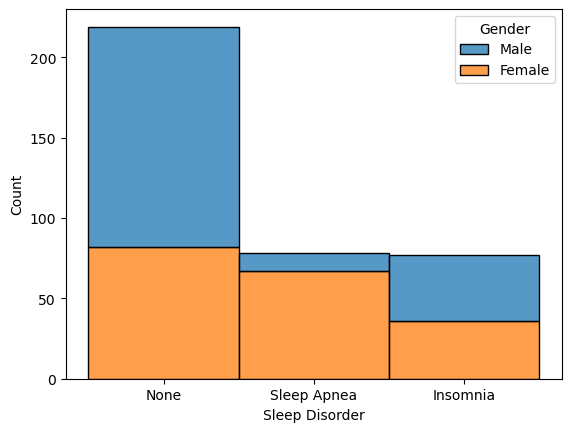

In [9]:
#using seaborn library
sns.histplot(data=data, x='Sleep Disorder', hue='Gender', multiple="stack")

<AxesSubplot:xlabel='Quality of Sleep', ylabel='Count'>

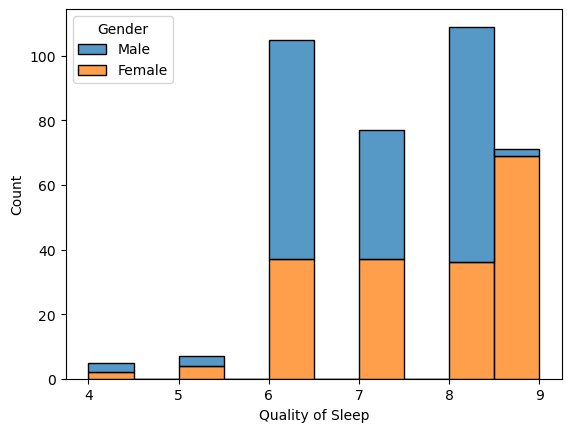

In [10]:
sns.histplot(data=data, x='Quality of Sleep', hue='Gender', multiple="stack")

In [11]:
#i want to see if age is also a factor
data["Age"].unique() #since there are so many values i'm going to change them into categories

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [12]:
def age_cat(age): #age category
    if age > 26 and age <= 36:
        return 'Adult'
    else:
        return 'Mid-Age'
    
data['Age'] = data['Age'].apply(age_cat)      

In [13]:
data["Age"].unique() 

array(['Adult', 'Mid-Age'], dtype=object)

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

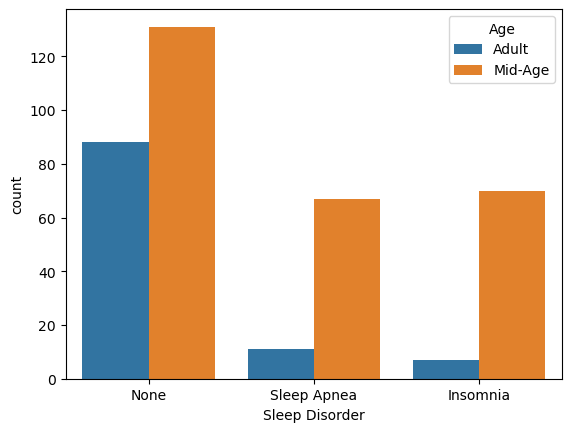

In [14]:
sns.countplot(data=data, x='Sleep Disorder', hue='Age') 

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

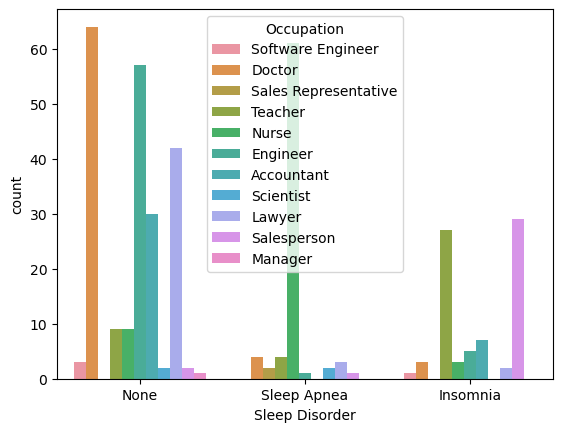

In [15]:
#i'm going to check for more things using the same method

sns.countplot(data=data, x='Sleep Disorder', hue='Occupation') 


<AxesSubplot:xlabel='Stress Level', ylabel='count'>

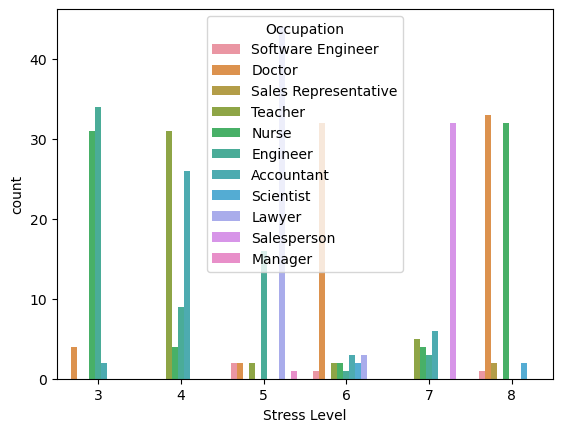

In [16]:
sns.countplot(data=data, x='Stress Level', hue='Occupation')  #conclusion nurses are very stressed xD

Data preprocessing phase

In [17]:
# df stands for my cleaned data frame
df =data.drop('Person ID', axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,Adult,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,Adult,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,Adult,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,Adult,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,Adult,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,Mid-Age,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,Mid-Age,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,Mid-Age,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,Mid-Age,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [22]:
df.dtypes

Gender                      object
Age                         object
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
   if df[column].dtype == object: 
    le=LabelEncoder()
   df[column] = le.fit_transform(df[column])

In [25]:
df.dtypes

Gender                     int32
Age                        int32
Occupation                 int32
Sleep Duration             int64
Quality of Sleep           int64
Physical Activity Level    int64
Stress Level               int64
BMI Category               int32
Blood Pressure             int32
Heart Rate                 int64
Daily Steps                int64
Sleep Disorder             int32
dtype: object

selection

#i'm using sleep disorder as my target variable because i want to test a person's sleep disorder based on various features like age, gender, occupation, lifestyle factors, and quality of sleep

In [26]:
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [27]:
#split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.dtypes

In [28]:
scaler = StandardScaler()

# Scale the numeric features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
#training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [34]:
#predictions
predictions = model.predict(X_test_scaled)



In [35]:
mse = mean_squared_error(y_test, predictions)
mse

0.2

In [36]:
from sklearn.metrics import classification_report
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.98      0.97        43
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.92

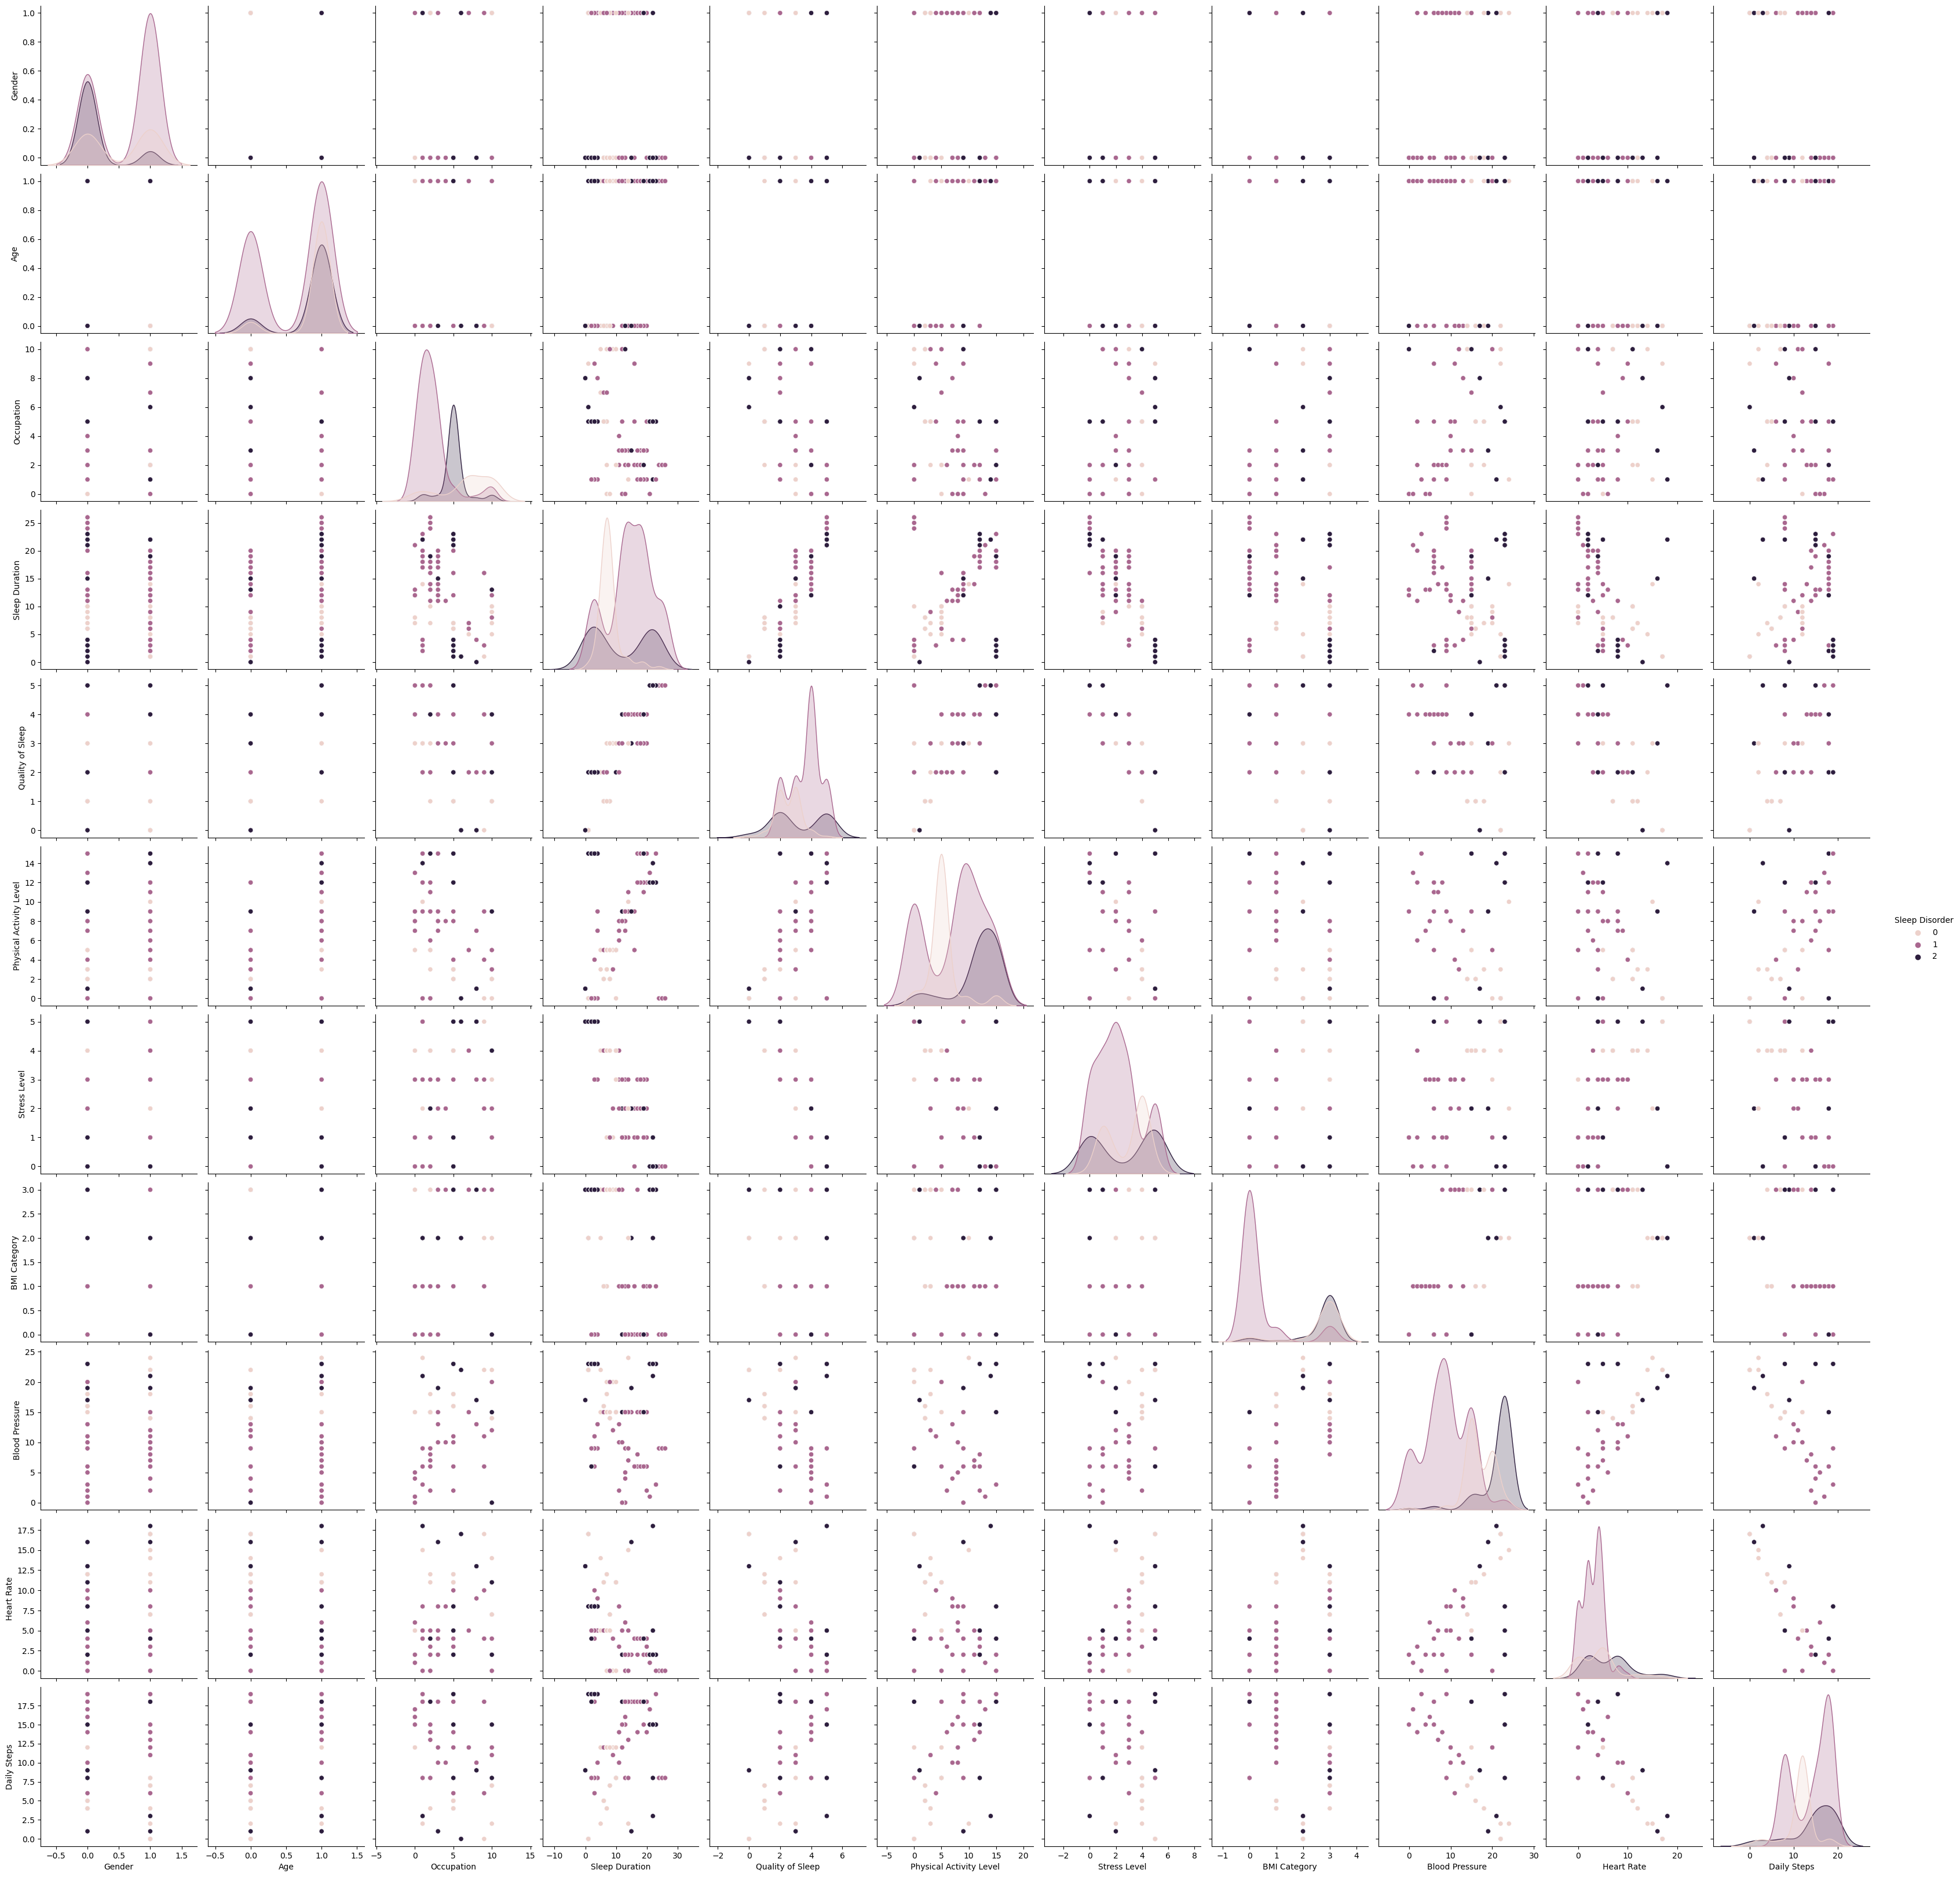

In [44]:
import matplotlib.pyplot as plt
pair_plot = sns.pairplot(df, hue="Sleep Disorder", height=3)
plt.show()